In [183]:
# import Libraries
import pandas as pd                      # used for import the dataset
import numpy as np                       # used for multidimensional array
import matplotlib.pyplot as plt          # used for plot the Graph

#Task: import the dataset (iris.csv)
dataset = pd.read_csv('Iris.csv')

dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [184]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
  
dataset['Species']= label_encoder.fit_transform(dataset['Species'])
dataset['Species'].unique()

array([0, 1, 2])

In [185]:
X = dataset.iloc[:,1:-1].values       # predictor attribute 
y = dataset.iloc[:,-1].values        # target attribute
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [186]:
# Task : split the dataset into test set and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/15, random_state=51)


In [187]:
# Task : scale the feature
from sklearn.preprocessing import scale

X_train = scale(X_train)
X_test = scale(X_test)

In [188]:
# Part 2: Building the Model
# import SVM regression model from sscikit learn
from sklearn.svm import SVR 

# Task 3: init the model and Set the kernel to ‘radial basic function’ 

model = SVR(kernel='rbf', C=1, gamma='auto')


# #task 4: fit the training model into our SVM classifer regression model

model.fit(X_train, y_train)



SVR(C=1, gamma='auto')

In [189]:
#Part 3: Making a prediction and visualize the result
# Task 5 : making a prediction

y_predict = model.predict(X_test)
y_pred = [round(i) for i in y_predict]

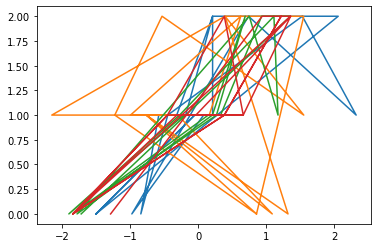

In [190]:
# Task 6: Visualising the classification results
import matplotlib.pyplot as plt

pltlist = []
plt.plot(X_test, y_pred)
plt.show()

In [191]:
#Task 7: print accuracy_score, classification report, confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score: {}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))


Accuracy Score: 70.0%
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.45      1.00      0.62         5
           2       1.00      0.45      0.62        11

    accuracy                           0.70        20
   macro avg       0.82      0.82      0.75        20
weighted avg       0.86      0.70      0.70        20

Confusion Matrix:  [[4 0 0]
 [0 5 0]
 [0 6 5]]
